In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
import matplotlib.pyplot as plt


In [27]:
df = pd.read_csv("sensor-nodes.csv")
df.head()


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [28]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train.shape)


Shape of X_train: (7000, 17)


In [31]:
sequence_length = X_train.shape[1]
num_features = 1

X_train_reshaped = X_train.reshape(-1, sequence_length, num_features)
X_val_reshaped = X_val.reshape(-1, sequence_length, num_features)
X_test_reshaped = X_test.reshape(-1, sequence_length, num_features)


In [32]:
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

# model.add(Dense(1, activation='sigmoid'))


In [33]:
adam_optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer,
              loss='binary_crossentropy', metrics=['accuracy'])

adam_history = model.fit(X_train_reshaped, y_train, epochs=30,
                         batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/30


219/219 [==============================] - 2s 5ms/step - loss: 0.5987 - accuracy: 0.1550 - val_loss: 0.3173 - val_accuracy: 0.2267
Epoch 2/30
219/219 [==============================] - 1s 4ms/step - loss: 0.5640 - accuracy: 0.6990 - val_loss: 0.3081 - val_accuracy: 0.8153
Epoch 3/30
219/219 [==============================] - 1s 4ms/step - loss: 0.5614 - accuracy: 0.8666 - val_loss: 0.3032 - val_accuracy: 0.8613
Epoch 4/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5598 - accuracy: 0.8983 - val_loss: 0.3007 - val_accuracy: 0.8520
Epoch 5/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5581 - accuracy: 0.9104 - val_loss: 0.2983 - val_accuracy: 0.8873
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5568 - accuracy: 0.9186 - val_loss: 0.2970 - val_accuracy: 0.9093
Epoch 7/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5520 - accuracy: 0.9231 - val_loss: 0.2961 - val_accuracy: 0.9200
Epoch 8/30
219/21

In [34]:
nadam_optimizer = Nadam(learning_rate=0.001)

model.compile(optimizer=nadam_optimizer,
              loss='binary_crossentropy', metrics=['accuracy'])

nadam_history = model.fit(X_train_reshaped, y_train, epochs=30,
                          batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.5226 - accuracy: 0.9414 - val_loss: 0.2361 - val_accuracy: 0.9300
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5205 - accuracy: 0.9444 - val_loss: 0.2390 - val_accuracy: 0.9547
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.9466 - val_loss: 0.2382 - val_accuracy: 0.9540
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.9463 - val_loss: 0.2367 - val_accuracy: 0.9447
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.9470 - val_loss: 0.2384 - val_accuracy: 0.9547
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.9443 - val_loss: 0.2370 - val_accuracy: 0.9533
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5200 - accuracy: 0.9454 - val_loss: 0.2358 - val_accuracy: 0.9513
Epoch 

In [35]:
adagrad_optimizer = Adagrad(learning_rate=0.001)

model.compile(optimizer=adagrad_optimizer,
              loss='binary_crossentropy', metrics=['accuracy'])

adagrad_history = model.fit(X_train_reshaped, y_train, epochs=30,
                            batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5213 - accuracy: 0.9460 - val_loss: 0.2345 - val_accuracy: 0.9520
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5201 - accuracy: 0.9480 - val_loss: 0.2349 - val_accuracy: 0.9547
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5186 - accuracy: 0.9484 - val_loss: 0.2351 - val_accuracy: 0.9547
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.9494 - val_loss: 0.2353 - val_accuracy: 0.9547
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5198 - accuracy: 0.9494 - val_loss: 0.2355 - val_accuracy: 0.9547
Epoch 6/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5210 - accuracy: 0.9497 - val_loss: 0.2355 - val_accuracy: 0.9547
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.9496 - val_loss: 0.2356 - val_accuracy: 0.9547
Epoch 

In [36]:
sgd_optimizer = SGD(learning_rate=0.001)

model.compile(optimizer=sgd_optimizer,
              loss='binary_crossentropy', metrics=['accuracy'])

sgd_history = model.fit(X_train_reshaped, y_train, epochs=30,
                        batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/30
219/219 [==============================] - 1s 4ms/step - loss: 0.5207 - accuracy: 0.9496 - val_loss: 0.2360 - val_accuracy: 0.9547
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5193 - accuracy: 0.9497 - val_loss: 0.2361 - val_accuracy: 0.9547
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.9497 - val_loss: 0.2361 - val_accuracy: 0.9547
Epoch 4/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5165 - accuracy: 0.9497 - val_loss: 0.2361 - val_accuracy: 0.9547
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5186 - accuracy: 0.9497 - val_loss: 0.2360 - val_accuracy: 0.9547
Epoch 6/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5224 - accuracy: 0.9490 - val_loss: 0.2360 - val_accuracy: 0.9547
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5168 - accuracy: 0.9491 - val_loss: 0.2360 - val_accuracy: 0.9547
Epoch 

In [37]:
rms_optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=rms_optimizer,
              loss='binary_crossentropy', metrics=['accuracy'])

rms_history = model.fit(X_train_reshaped, y_train, epochs=30,
                        batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/30
219/219 [==============================] - 1s 4ms/step - loss: 0.5189 - accuracy: 0.9461 - val_loss: 0.2362 - val_accuracy: 0.9533
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5217 - accuracy: 0.9469 - val_loss: 0.2385 - val_accuracy: 0.9547
Epoch 3/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5213 - accuracy: 0.9470 - val_loss: 0.2374 - val_accuracy: 0.9547
Epoch 4/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5221 - accuracy: 0.9479 - val_loss: 0.2377 - val_accuracy: 0.9540
Epoch 5/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5199 - accuracy: 0.9479 - val_loss: 0.2387 - val_accuracy: 0.9533
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.9461 - val_loss: 0.2359 - val_accuracy: 0.9533
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.9467 - val_loss: 0.2379 - val_accuracy: 0.9553
Epoch 

In [38]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.9513
Test Loss: 0.25013643503189087
Test Accuracy: 0.9513333439826965


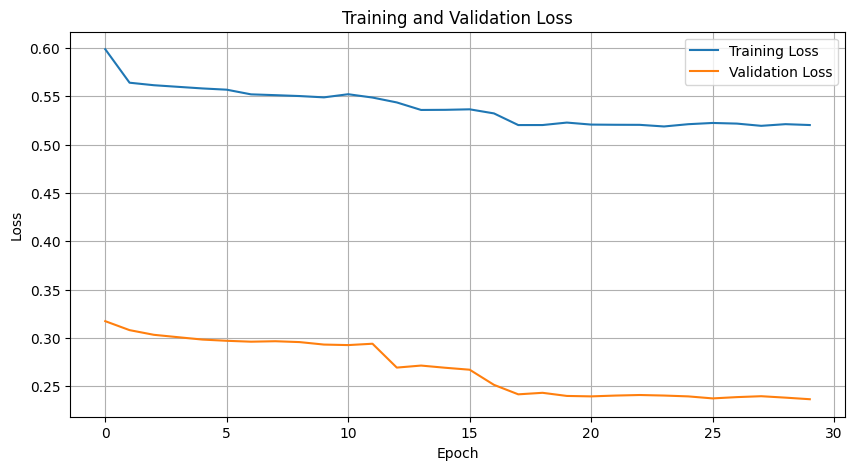

In [39]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['loss'], label='Training Loss')
plt.plot(adam_history.history['val_loss'], label='Validation Loss')

plt.title("Training and Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


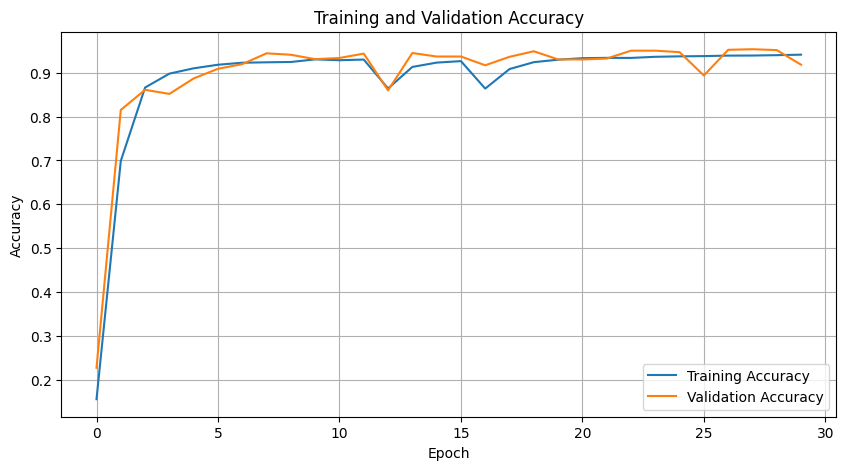

In [40]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['accuracy'], label='Training Accuracy')
plt.plot(adam_history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


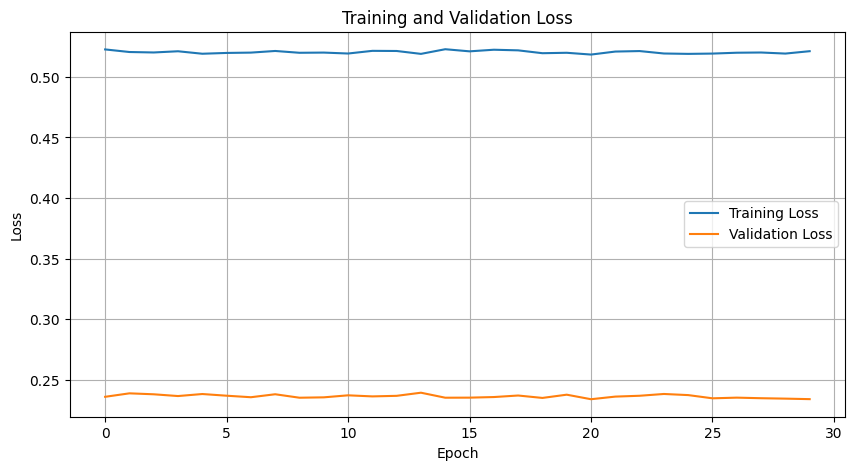

In [41]:
plt.figure(figsize=(10, 5))

plt.plot(nadam_history.history['loss'], label='Training Loss')
plt.plot(nadam_history.history['val_loss'], label='Validation Loss')

plt.title("Training and Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


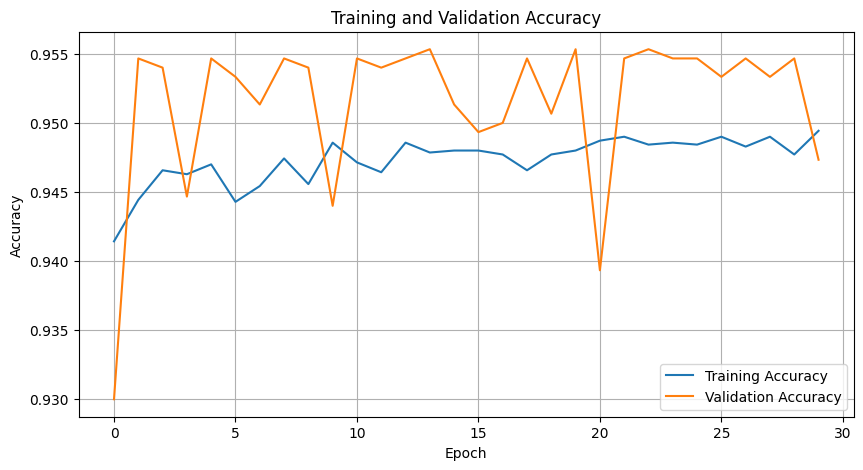

In [42]:
plt.figure(figsize=(10, 5))

plt.plot(nadam_history.history['accuracy'], label='Training Accuracy')
plt.plot(nadam_history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


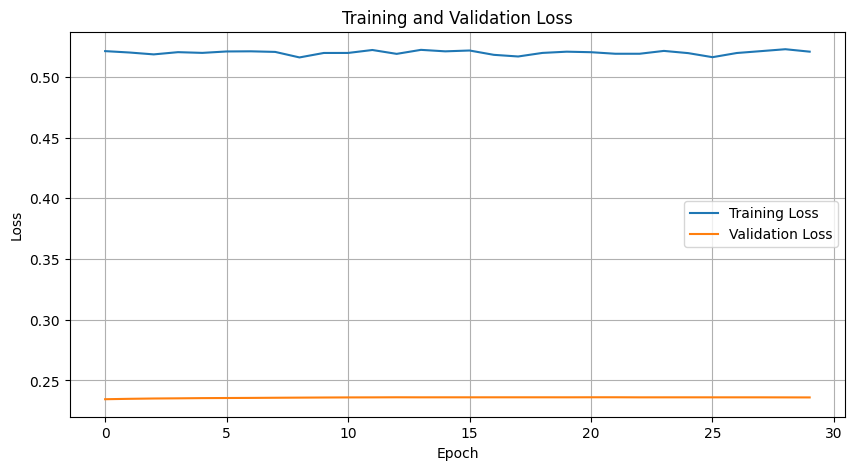

In [43]:
plt.figure(figsize=(10, 5))

plt.plot(adagrad_history.history['loss'], label='Training Loss')
plt.plot(adagrad_history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


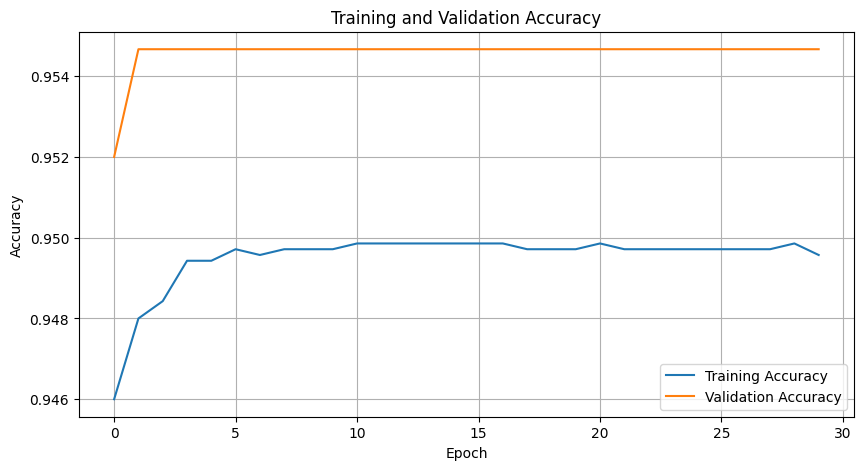

In [44]:
plt.figure(figsize=(10, 5))

plt.plot(adagrad_history.history['accuracy'], label='Training Accuracy')
plt.plot(adagrad_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


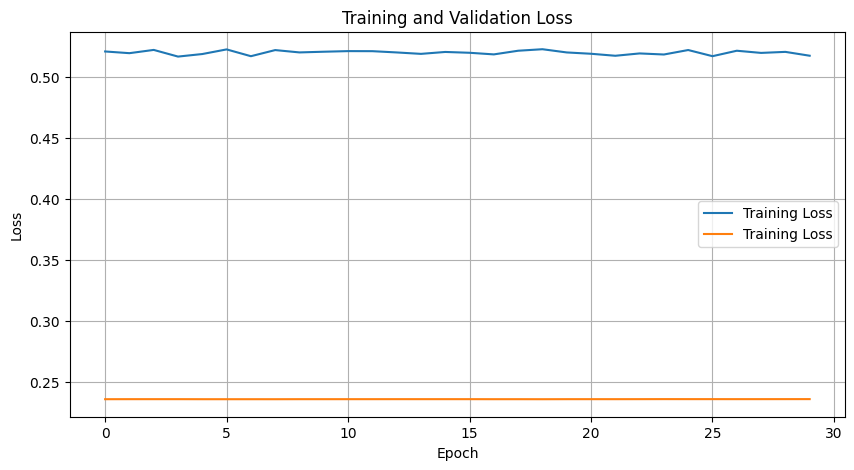

In [45]:
plt.figure(figsize=(10, 5))

plt.plot(sgd_history.history['loss'], label='Training Loss')
plt.plot(sgd_history.history['val_loss'], label='Training Loss')

plt.title("Training and Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


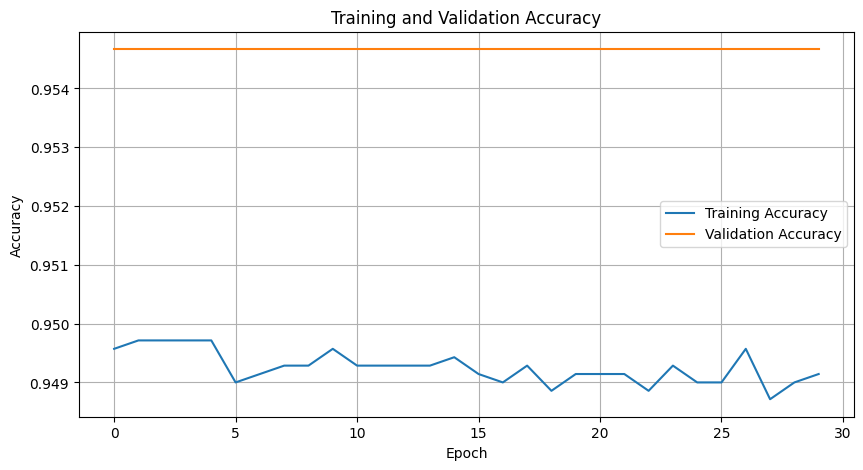

In [46]:
plt.figure(figsize=(10, 5))

plt.plot(sgd_history.history['accuracy'], label='Training Accuracy')
plt.plot(sgd_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


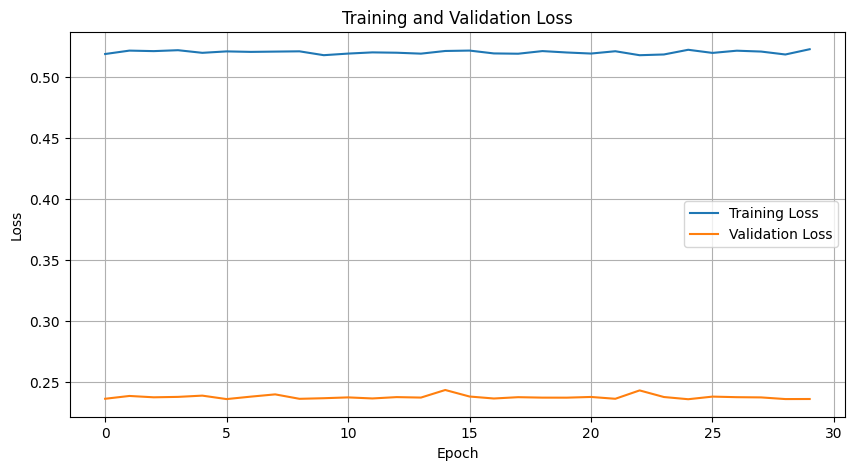

In [47]:
plt.figure(figsize=(10, 5))

plt.plot(rms_history.history['loss'], label='Training Loss')
plt.plot(rms_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


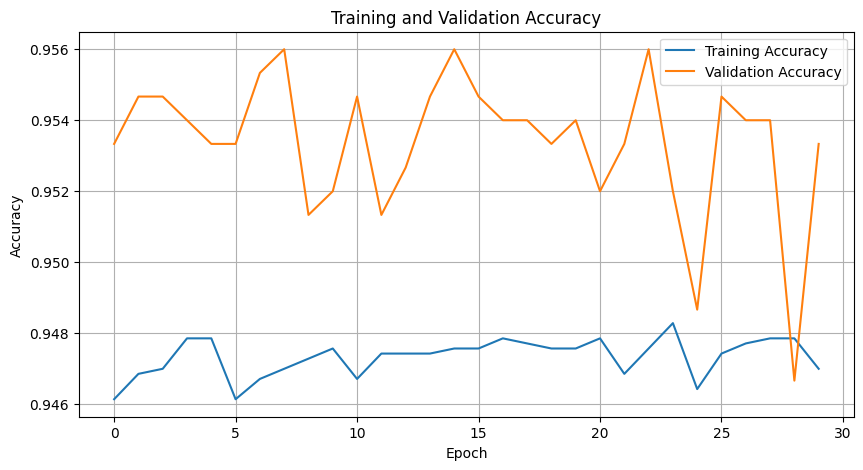

In [48]:
plt.figure(figsize=(10, 5))

plt.plot(rms_history.history['accuracy'], label='Training Accuracy')
plt.plot(rms_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


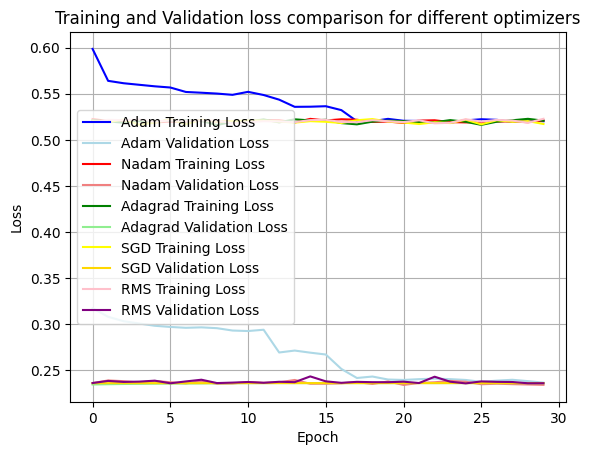

In [49]:
plt.plot(adam_history.history['loss'],
         label="Adam Training Loss", color="blue")


plt.plot(adam_history.history['val_loss'],
         label="Adam Validation Loss", color="lightblue")


plt.plot(nadam_history.history['loss'],
         label="Nadam Training Loss", color="red")
plt.plot(nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color="lightcoral")

plt.plot(adagrad_history.history['loss'],
         label="Adagrad Training Loss", color="green")
plt.plot(adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color="lightgreen")

plt.plot(sgd_history.history['loss'],
         label="SGD Training Loss", color="yellow")
plt.plot(sgd_history.history['val_loss'],
         label="SGD Validation Loss", color="gold")

plt.plot(rms_history.history['loss'],
         label="RMS Training Loss", color="pink")
plt.plot(rms_history.history['val_loss'],
         label="RMS Validation Loss", color="purple")

plt.title("Training and Validation loss comparison for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


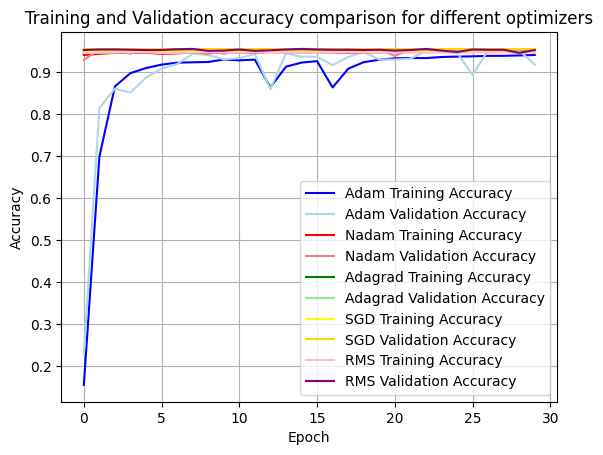

In [50]:
plt.plot(adam_history.history['accuracy'],
         label="Adam Training Accuracy", color="blue")


plt.plot(adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color="lightblue")


plt.plot(nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color="red")


plt.plot(nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color="lightcoral")


plt.plot(adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color="green")


plt.plot(adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color="lightgreen")

plt.plot(sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color="yellow")
plt.plot(sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color="gold")\


plt.plot(rms_history.history['accuracy'],
         label="RMS Training Accuracy", color="pink")
plt.plot(rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color="purple")

plt.title("Training and Validation accuracy comparison for different optimizers")


plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


plt.grid(True)


plt.show()
